<a href="https://colab.research.google.com/github/nyang-cook/Colabatory/blob/main/%EC%95%99%EC%83%81%EB%B8%94(Ensemble).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [ ]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_diabetes
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [ ]:
iris = load_iris()
wine = load_wine()
breast_cancer = load_breast_cancer()
diabetes = load_diabetes()

#### KNN

##### 붓꽃 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data,
    y = iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0026561260223388673 (+/- 0.0011196971781730204)
avg score time: 0.004068231582641602 (+/- 0.00047790211963343716)
avg test score: 0.96 (+/- 0.024944382578492935)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data,
    y = iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.029023027420043944 (+/- 0.0037521526774605997)
avg score time: 0.010021495819091796 (+/- 0.0012926576965046565)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data,
    y = wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0028656959533691407 (+/- 0.0010879022950212307)
avg score time: 0.0054150581359863285 (+/- 0.001379411461436658)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data,
    y = wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.043216514587402347 (+/- 0.0037463457882078314)
avg score time: 0.013728046417236328 (+/- 0.0013481486746596508)
avg test score: 0.9493650793650794 (+/- 0.021392680112801845)


##### 유방암 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = breast_cancer.data,
    y = breast_cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002132749557495117 (+/- 0.0005470073493701166)
avg score time: 0.0022912025451660156 (+/- 0.0005143318858339474)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = breast_cancer.data,
    y = breast_cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04106869697570801 (+/- 0.010765555617648019)
avg score time: 0.0227205753326416 (+/- 0.00564883678240217)
avg test score: 0.9631268436578171 (+/- 0.01697425063688104)


#### SVC

##### 붓꽃 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data,
    y = iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0037860870361328125 (+/- 0.0023713483717377336)
avg score time: 0.0010986328125 (+/- 0.00020698083439291536)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data,
    y = iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03508157730102539 (+/- 0.0026254037196131097)
avg score time: 0.004954910278320313 (+/- 0.0005497845089062268)
avg test score: 0.96 (+/- 0.01333333333333333)


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data,
    y = wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0030473709106445313 (+/- 0.00024997946870374715)
avg score time: 0.0012996196746826172 (+/- 0.00013334732159662967)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data,
    y = wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06079244613647461 (+/- 0.006451196215171358)
avg score time: 0.008720684051513671 (+/- 0.0017550054177451382)
avg test score: 0.9831746031746033 (+/- 0.013740935306558193)


##### 유방암 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = breast_cancer.data,
    y = breast_cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005881738662719726 (+/- 0.0009219914882018514)
avg score time: 0.0019843578338623047 (+/- 0.00015810391509796725)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = breast_cancer.data,
    y = breast_cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15954818725585937 (+/- 0.16698924697956793)
avg score time: 0.04698886871337891 (+/- 0.03930269942157518)
avg test score: 0.9613258810743673 (+/- 0.017213853979538167)


#### Decision Tree

##### 붓꽃 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data,
    y = iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005333375930786133 (+/- 0.006605879839577222)
avg score time: 0.0010940074920654298 (+/- 0.0004842314703604316)
avg test score: 0.9666666666666668 (+/- 0.036514837167011066)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data,
    y = iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03282709121704101 (+/- 0.0011817591754162524)
avg score time: 0.003667259216308594 (+/- 0.00021425974003327715)
avg test score: 0.9399999999999998 (+/- 0.038873012632301994)


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data,
    y = wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00402674674987793 (+/- 0.0010234424098248603)
avg score time: 0.0012475967407226563 (+/- 9.191181871915182e-05)
avg test score: 0.8765079365079365 (+/- 0.06933183613709935)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data,
    y = wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04185752868652344 (+/- 0.008178654314837506)
avg score time: 0.004325151443481445 (+/- 0.0005403728351436624)
avg test score: 0.9444444444444444 (+/- 0.04969039949999535)


##### 유방암 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = breast_cancer.data,
    y = breast_cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0018353462219238281 (+/- 0.00015595848428186508)
avg score time: 0.01395716667175293 (+/- 0.023927681968048717)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = breast_cancer.data,
    y = breast_cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03428187370300293 (+/- 0.008052989212876232)
avg score time: 0.0179140567779541 (+/- 0.0008793561654333911)
avg test score: 0.9595870206489675 (+/- 0.006971918072338138)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [ ]:
boston = fetch_openml(name = 'boston')
diabetes = load_diabetes

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


#### KNN

##### 보스턴 주택 가격 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data,
    y = boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006785154342651367 (+/- 0.0011326926297930745)
avg score time: 0.004253816604614258 (+/- 0.00027871702545693923)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data,
    y = boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03500432968139648 (+/- 0.00281801884167683)
avg score time: 0.015903377532958986 (+/- 0.0015596691778057348)
avg test score: 0.4243163745565437 (+/- 0.11851118954571795)


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data,
    y = diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0028872013092041014 (+/- 0.0020841375026218593)
avg score time: 0.002590465545654297 (+/- 0.000739011411871942)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data,
    y = diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02863306999206543 (+/- 0.002605571939750317)
avg score time: 0.012794685363769532 (+/- 0.0008053439880171455)
avg test score: 0.4194673337555064 (+/- 0.06423357131133112)


#### SVR

##### 보스턴 주택 가격 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data,
    y = boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.019696664810180665 (+/- 0.0026161340894630706)
avg score time: 0.006339025497436523 (+/- 0.0005524138288827355)
avg test score: 0.17631266230186574 (+/- 0.522491491512898)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data,
    y = boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07118668556213378 (+/- 0.009983442929580711)
avg score time: 0.019584083557128908 (+/- 0.0013474108378563445)
avg test score: 0.11891966095559103 (+/- 0.30560669990335443)


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data,
    y = diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.009125614166259765 (+/- 0.0011006921435157686)
avg score time: 0.0030469417572021483 (+/- 9.539632359594382e-05)
avg test score: 0.14659868748701582 (+/- 0.02190883171995428)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data,
    y = diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05377035140991211 (+/- 0.006594359885920574)
avg score time: 0.014272642135620118 (+/- 0.0009774662377232753)
avg test score: 0.06106281803655367 (+/- 0.0322145182924009)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data,
    y = boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.012531805038452148 (+/- 0.002636234869725212)
avg score time: 0.003318309783935547 (+/- 0.00017115870363152572)
avg test score: 0.06815263471377682 (+/- 0.9337299949404159)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data,
    y = boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11024832725524902 (+/- 0.05770700442432547)
avg score time: 0.013824796676635743 (+/- 0.010932699726019724)
avg test score: 0.42661991490735396 (+/- 0.3724020072371515)


##### 당뇨병 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data,
    y = diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005212068557739258 (+/- 0.0008544087369223802)
avg score time: 0.0014584064483642578 (+/- 0.0003216017246121587)
avg test score: -0.16924053625782043 (+/- 0.11000082293833992)


In [ ]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data,
    y = diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04036202430725098 (+/- 0.002946244923056769)
avg score time: 0.004567098617553711 (+/- 0.00029183257627398074)
avg test score: 0.3678177478275251 (+/- 0.094320219780459)


BaggingRegressor는 사용자가 앙상블에 사용할 기본 모델을 지정해야 하지만, RandomForestClassifier는 앙상블 모델로 고정된 구조로 사용됩니다.

## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data,
    y = iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.36993117332458497 (+/- 0.16691992210313883)
avg score time: 0.015023088455200196 (+/- 0.007358235811726976)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data,
    y = wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3775800228118896 (+/- 0.20575424984581767)
avg score time: 0.009988498687744141 (+/- 0.0014321560736161615)
avg test score: 0.9720634920634922 (+/- 0.017571077268107502)


In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X = breast_cancer.data,
    y = breast_cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.033751058578491214 (+/- 0.0059791751124822394)
avg score time: 0.0033143997192382813 (+/- 0.002700978354581054)
avg test score: 0.5575076984447929 (+/- 0.20843891795138933)


### Random Forests 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data,
    y = boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.722635555267334 (+/- 0.11345440499981646)
avg score time: 0.015196847915649413 (+/- 0.0008790279602593166)
avg test score: 0.5953737109640852 (+/- 0.25010757315428)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data,
    y = diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.8536298751831055 (+/- 0.2156494443355847)
avg score time: 0.01718130111694336 (+/- 0.005662354821197993)
avg test score: 0.4181506763098574 (+/- 0.04898420348136281)


### Extremely Randomized Trees 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data,
    y = iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.22644290924072266 (+/- 0.014845576470069446)
avg score time: 0.010271167755126953 (+/- 0.0008667824566269767)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data,
    y = wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.21376514434814453 (+/- 0.09279609921445763)
avg score time: 0.015270805358886719 (+/- 0.0077235457625603856)
avg test score: 0.9831746031746033 (+/- 0.013740935306558195)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = breast_cancer.data,
    y = breast_cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.21238083839416505 (+/- 0.013836454738100357)
avg score time: 0.013332700729370118 (+/- 0.006245261796017408)
avg test score: 0.9648501785437045 (+/- 0.014678771565898177)


### Extremely Randomized Trees 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data,
    y = boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.5912309169769288 (+/- 0.11113401558863381)
avg score time: 0.02643418312072754 (+/- 0.01060851643463619)
avg test score: 0.6325140546073571 (+/- 0.2639131573149107)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data,
    y = diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.24130582809448242 (+/- 0.056295172072179135)
avg score time: 0.009221792221069336 (+/- 0.0019380267027042071)
avg test score: 0.4428764788305548 (+/- 0.03668024438580814)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

<ipython-input-81-795f20cd1672>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [ ]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [ ]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators = n_estimators),
          ExtraTreesClassifier(n_estimators = n_estimators)]

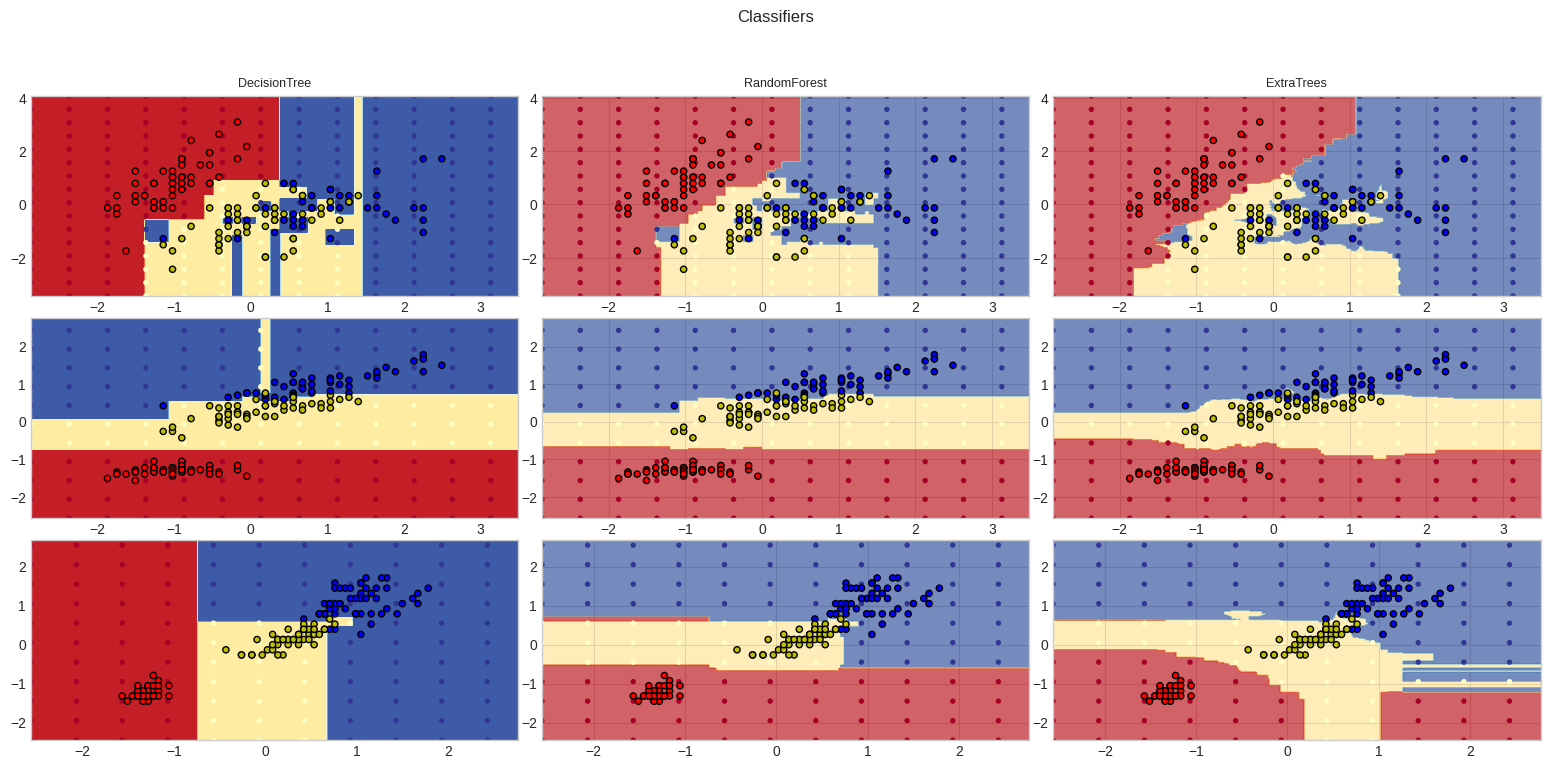

In [ ]:
plt.figure(figsize=(16, 8))

for pair in ([0,1],[0,2],[2,3]):

  for model in models:

    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X, y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")

    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=ListedColormap(['r', 'y', 'b']), edgecolors='k')
    plot_idx += 1

plt.suptitle("Classifiers", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

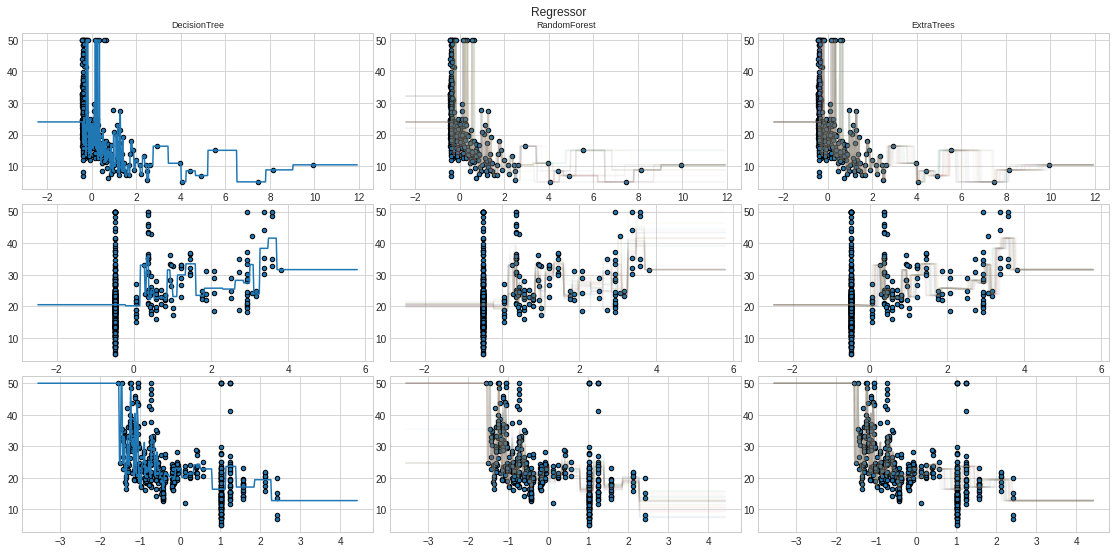

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data,
    y = iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

avg fit time: 0.1709841251373291 (+/- 0.0161173589212362)
avg score time: 0.016985607147216798 (+/- 0.0027659437399340054)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data,
    y = wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

avg fit time: 0.5810459136962891 (+/- 0.09285312358633815)
avg score time: 0.045238399505615236 (+/- 0.017026464046812777)
avg test score: 0.8028571428571428 (+/- 0.16007729929178363)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = breast_cancer.data,
    y = breast_cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

avg fit time: 0.7575866222381592 (+/- 0.08831388266407998)
avg score time: 0.0291140079498291 (+/- 0.006316386167005828)
avg test score: 0.9718677224033534 (+/- 0.0195587047134823)


### AdaBoost 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data,
    y = boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13000202178955078 (+/- 0.011647481591630834)
avg score time: 0.010432958602905273 (+/- 0.0017019338422224184)
avg test score: 0.5900786169909679 (+/- 0.2339570667145456)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data,
    y = diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11300020217895508 (+/- 0.01201910003848792)
avg score time: 0.007382059097290039 (+/- 0.0011756913314606228)
avg test score: 0.4031450011635469 (+/- 0.051582457639851496)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data,
    y = iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04014110565185547 (+/- 0.015258691218181665)
avg score time: 0.0049495697021484375 (+/- 0.002186122016699678)
avg test score: 0.538296177782511 (+/- 0.45108976080048535)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data,
    y = wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11203603744506836 (+/- 0.05624711355456662)
avg score time: 0.010085487365722656 (+/- 0.004689411792432621)
avg test score: 0.27918953027648674 (+/- 0.36030495837408427)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = breast_cancer.data,
    y = breast_cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.17772021293640136 (+/- 0.005890127383703696)
avg score time: 0.007101917266845703 (+/- 0.00010670648246331564)
avg test score: 0.8789241563252567 (+/- 0.038781426527103494)


### Gradient Tree Boosting 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data,
    y = boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.8284519672393799 (+/- 0.42138941245624806)
avg score time: 0.011881017684936523 (+/- 0.006626682176746948)
avg test score: 0.6811368946349403 (+/- 0.15279985431744314)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data,
    y = diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.336643123626709 (+/- 0.06921494481371036)
avg score time: 0.0022142410278320314 (+/- 0.00010793137186719805)
avg test score: 0.40781609449148826 (+/- 0.06969555347837629)


cross_val_score**는 여러 번 모델을 학습하고 평가하기 때문에 평균 성능이 더욱 신뢰할 수 있습니다. 데이터 분할에 따른 변동성을 줄이기 때문이죠.
**train_test_split**은 한 번의 평가로 끝나기 때문에, 특정한 데이터 분할에서만 잘 동작할 수 있어 운에 따라 성능이 달라질 수 있습니다.

## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='hard'
)

In [ ]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f)[%s]'%(scores.mena()))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

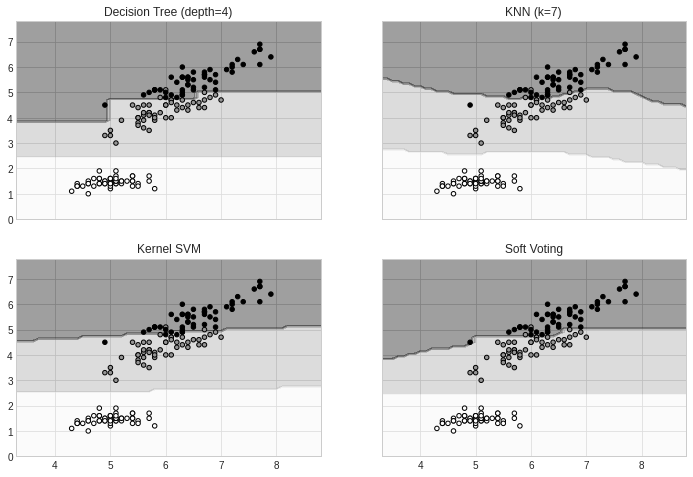

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.67 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.21) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

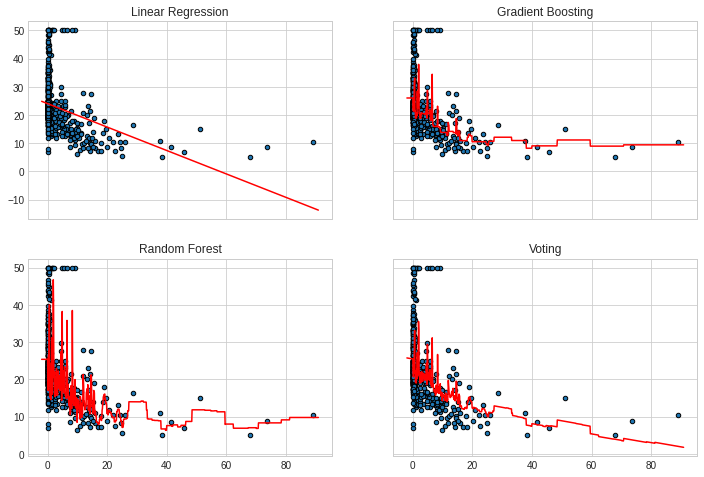

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

avg fit time: 0.14769234657287597 (+/- 0.003973230032571223)
avg score time: 0.0029734134674072265 (+/- 8.165947363439729e-05)
avg test score: 0.3193125598078287 (+/- 0.3328757426063098)


#### 회귀식 시각화

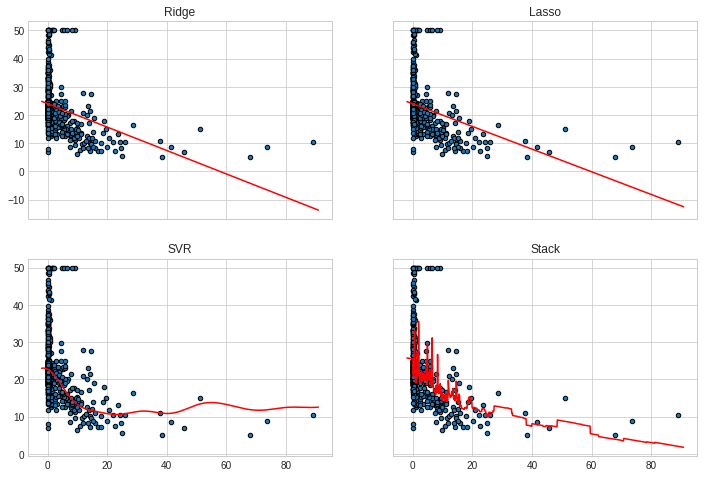

### 스택 분류

avg fit time: 0.2862356185913086 (+/- 0.007009096495986199)
avg score time: 0.008571338653564454 (+/- 0.00010991095462228061)
avg test score: 0.96 (+/- 0.024944382578492935)


#### 결정 경계 시각화

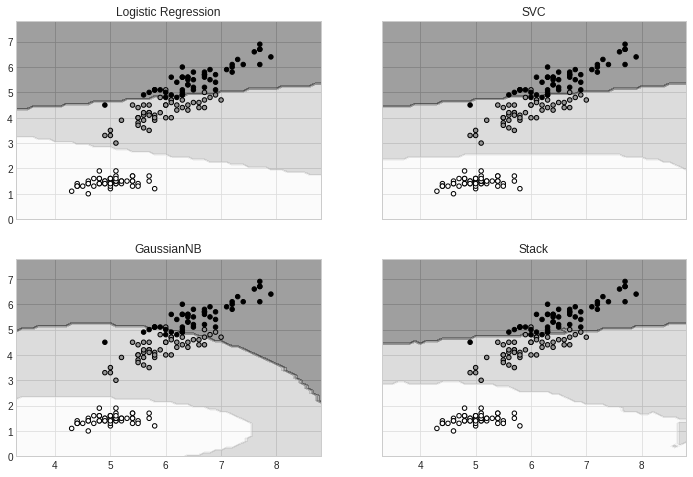